In [1]:
import pandas as pd

In [2]:
df_fn = pd.read_csv("doi_filename_rev12_filter.tsv", sep="\t")
df_fn.head()

,Doi,rev12,filter,filename
0,10.1186/s12955-021-01889-4,FY,1,34781978
1,10.1093/humrep/dex057,FY,2,28383700
2,10.1007/s11136-021-03007-9,N,1,34613597
3,10.1186/s12955-020-01475-0,AY,1,32727498
4,10.1007/s10198-021-01307-y,FY,1,33893889


In [3]:
df = pd.read_csv("fulltext_analysis_detailed.csv")

In [4]:
df = df.transpose().iloc[1:]

In [5]:
df.iloc[0][0] = 'pmid'

In [6]:
df.columns = df.iloc[0]

In [7]:
df = df.iloc[1:]

In [8]:
df.head()

0,pmid,index,value,utility,utilities,score,mobility,self-care,usual activities,pain,discomfort,anxiety,depression,looking after myself,doing usual activities,having pain or discomfort,feeling worried,feeling sad,feeling unhappy
1,24055176,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,26076401,True,True,True,False,True,True,True,False,True,True,True,True,False,False,False,False,False,False
3,34034603,False,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False
4,22138342,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
5,22575768,False,True,True,False,True,True,True,False,True,True,True,True,False,False,False,False,False,False


In [9]:
df = df.merge(df_fn, left_on='pmid', right_on='filename')

In [10]:
df.head()

,pmid,index,value,utility,utilities,score,mobility,self-care,usual activities,pain,...,looking after myself,doing usual activities,having pain or discomfort,feeling worried,feeling sad,feeling unhappy,Doi,rev12,filter,filename
0,24055176,True,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,10.1016/j.endonu.2013.05.005,N,2,24055176
1,26076401,True,True,True,False,True,True,True,False,True,...,False,False,False,False,False,False,10.1111/ner.12324,FY,1,26076401
2,34034603,False,True,True,False,True,False,False,False,True,...,False,False,False,False,False,False,10.1080/01443615.2021.1904222,N,2,34034603
3,22138342,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,10.1016/j.cjca.2011.09.012,FY,2,22138342
4,22575768,False,True,True,False,True,True,True,False,True,...,False,False,False,False,False,False,10.1016/j.healthpol.2012.04.005,FY,2,22575768


In [11]:
df.replace({"False": 0, "True": 1}, inplace=True)

In [12]:
df.head()

,pmid,index,value,utility,utilities,score,mobility,self-care,usual activities,pain,...,looking after myself,doing usual activities,having pain or discomfort,feeling worried,feeling sad,feeling unhappy,Doi,rev12,filter,filename
0,24055176,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,10.1016/j.endonu.2013.05.005,N,2,24055176
1,26076401,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,10.1111/ner.12324,FY,1,26076401
2,34034603,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,10.1080/01443615.2021.1904222,N,2,34034603
3,22138342,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,10.1016/j.cjca.2011.09.012,FY,2,22138342
4,22575768,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,10.1016/j.healthpol.2012.04.005,FY,2,22575768


In [13]:
df["label"] = df["rev12"] != "N"

In [14]:
df.columns

Index(['pmid', 'index', 'value', 'utility', 'utilities', 'score', 'mobility',
       'self-care', 'usual activities', 'pain', 'discomfort', 'anxiety',
       'depression', 'looking after myself', 'doing usual activities',
       'having pain or discomfort', 'feeling worried', 'feeling sad',
       'feeling unhappy', 'Doi', 'rev12', 'filter', 'filename', 'label'],
      dtype='object')

In [15]:
relevant_columns = ['index', 'value', 'utility', 'utilities', 'score', 'mobility',
       'self-care', 'usual activities', 'pain', 'discomfort', 'anxiety',
       'depression', 'looking after myself', 'doing usual activities',
       'having pain or discomfort', 'feeling worried', 'feeling sad',
       'feeling unhappy']

In [16]:
df.dtypes

pmid                         object
index                         int64
value                         int64
utility                       int64
utilities                     int64
score                         int64
mobility                      int64
self-care                     int64
usual activities              int64
pain                          int64
discomfort                    int64
anxiety                       int64
depression                    int64
looking after myself          int64
doing usual activities        int64
having pain or discomfort     int64
feeling worried               int64
feeling sad                   int64
feeling unhappy               int64
Doi                          object
rev12                        object
filter                        int64
filename                     object
label                          bool
dtype: object

In [17]:
df.sum()[relevant_columns]

index                        150
value                        182
utility                      101
utilities                     47
score                        187
mobility                     136
self-care                    106
usual activities              91
pain                         181
discomfort                   119
anxiety                      139
depression                   143
looking after myself           2
doing usual activities         2
having pain or discomfort      2
feeling worried                1
feeling sad                    0
feeling unhappy                0
dtype: object

In [18]:
df.corr()["label"]

index                        0.242112
value                        0.246247
utility                      0.079681
utilities                    0.134244
score                        0.160354
mobility                     0.191197
self-care                    0.222760
usual activities             0.204265
pain                         0.156797
discomfort                   0.229297
anxiety                      0.197827
depression                   0.192252
looking after myself         0.081209
doing usual activities       0.081209
having pain or discomfort    0.081209
feeling worried              0.057279
feeling sad                       NaN
feeling unhappy                   NaN
filter                      -0.010228
label                        1.000000
Name: label, dtype: float64

In [19]:
print(pd.concat([df.sum()[relevant_columns], df.corr()["label"]], axis=1).to_latex())

\begin{tabular}{llr}
\toprule
{} &    0 &     label \\
\midrule
index                     &  150 &  0.242112 \\
value                     &  182 &  0.246247 \\
utility                   &  101 &  0.079681 \\
utilities                 &   47 &  0.134244 \\
score                     &  187 &  0.160354 \\
mobility                  &  136 &  0.191197 \\
self-care                 &  106 &  0.222760 \\
usual activities          &   91 &  0.204265 \\
pain                      &  181 &  0.156797 \\
discomfort                &  119 &  0.229297 \\
anxiety                   &  139 &  0.197827 \\
depression                &  143 &  0.192252 \\
looking after myself      &    2 &  0.081209 \\
doing usual activities    &    2 &  0.081209 \\
having pain or discomfort &    2 &  0.081209 \\
feeling worried           &    1 &  0.057279 \\
feeling sad               &    0 &       NaN \\
feeling unhappy           &    0 &       NaN \\
filter                    &  NaN & -0.010228 \\
label                   

In [20]:
tp = df[df["label"] == 1].sum()[relevant_columns] / len(df[df["label"] == 1])

In [21]:
N = len(df[df["label"] == 0])
P = len(df[df["label"] == 1])
ALL = len(df)

In [22]:
P, N, ALL

(121, 79, 200)

In [23]:
TP = df[df["label"] == 1].sum()[relevant_columns]
TN = N - df[df["label"] == 0].sum()[relevant_columns]

In [24]:
TP, TN

(index                        101
 value                        117
 utility                       65
 utilities                     34
 score                        117
 mobility                      91
 self-care                     75
 usual activities              65
 pain                         114
 discomfort                    83
 anxiety                       93
 depression                    95
 looking after myself           2
 doing usual activities         2
 having pain or discomfort      2
 feeling worried                1
 feeling sad                    0
 feeling unhappy                0
 dtype: object,
 index                        30
 value                        14
 utility                      43
 utilities                    66
 score                         9
 mobility                     34
 self-care                    48
 usual activities             53
 pain                         12
 discomfort                   43
 anxiety                      33
 depressi

In [25]:
PP = df.sum()[relevant_columns]
PN = ALL - df.sum()[relevant_columns]

In [26]:
#accuracy
(TP + TN) / ALL

index                        0.655
value                        0.655
utility                       0.54
utilities                      0.5
score                         0.63
mobility                     0.625
self-care                    0.615
usual activities              0.59
pain                          0.63
discomfort                    0.63
anxiety                       0.63
depression                    0.63
looking after myself         0.405
doing usual activities       0.405
having pain or discomfort    0.405
feeling worried                0.4
feeling sad                  0.395
feeling unhappy              0.395
dtype: object

In [27]:
#sensitivity / recall
TP / P

index                        0.834711
value                        0.966942
utility                       0.53719
utilities                    0.280992
score                        0.966942
mobility                     0.752066
self-care                    0.619835
usual activities              0.53719
pain                         0.942149
discomfort                    0.68595
anxiety                      0.768595
depression                   0.785124
looking after myself         0.016529
doing usual activities       0.016529
having pain or discomfort    0.016529
feeling worried              0.008264
feeling sad                       0.0
feeling unhappy                   0.0
dtype: object

In [28]:
#precision
TP / PP

index                        0.673333
value                        0.642857
utility                      0.643564
utilities                    0.723404
score                        0.625668
mobility                     0.669118
self-care                    0.707547
usual activities             0.714286
pain                         0.629834
discomfort                   0.697479
anxiety                      0.669065
depression                   0.664336
looking after myself              1.0
doing usual activities            1.0
having pain or discomfort         1.0
feeling worried                   1.0
feeling sad                       NaN
feeling unhappy                   NaN
dtype: object

In [29]:
#specificity
TN / N

index                        0.379747
value                        0.177215
utility                      0.544304
utilities                    0.835443
score                        0.113924
mobility                      0.43038
self-care                    0.607595
usual activities             0.670886
pain                         0.151899
discomfort                   0.544304
anxiety                      0.417722
depression                   0.392405
looking after myself              1.0
doing usual activities            1.0
having pain or discomfort         1.0
feeling worried                   1.0
feeling sad                       1.0
feeling unhappy                   1.0
dtype: object

### Decision tree

In [41]:
from sklearn import tree

In [42]:
X = df[relevant_columns].values

In [43]:
Y = df["label"].values * 1

In [44]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X, Y)

DecisionTreeClassifier(max_depth=6)

In [45]:
clf.score(X,Y)

0.79

In [46]:
import matplotlib.pyplot as plt

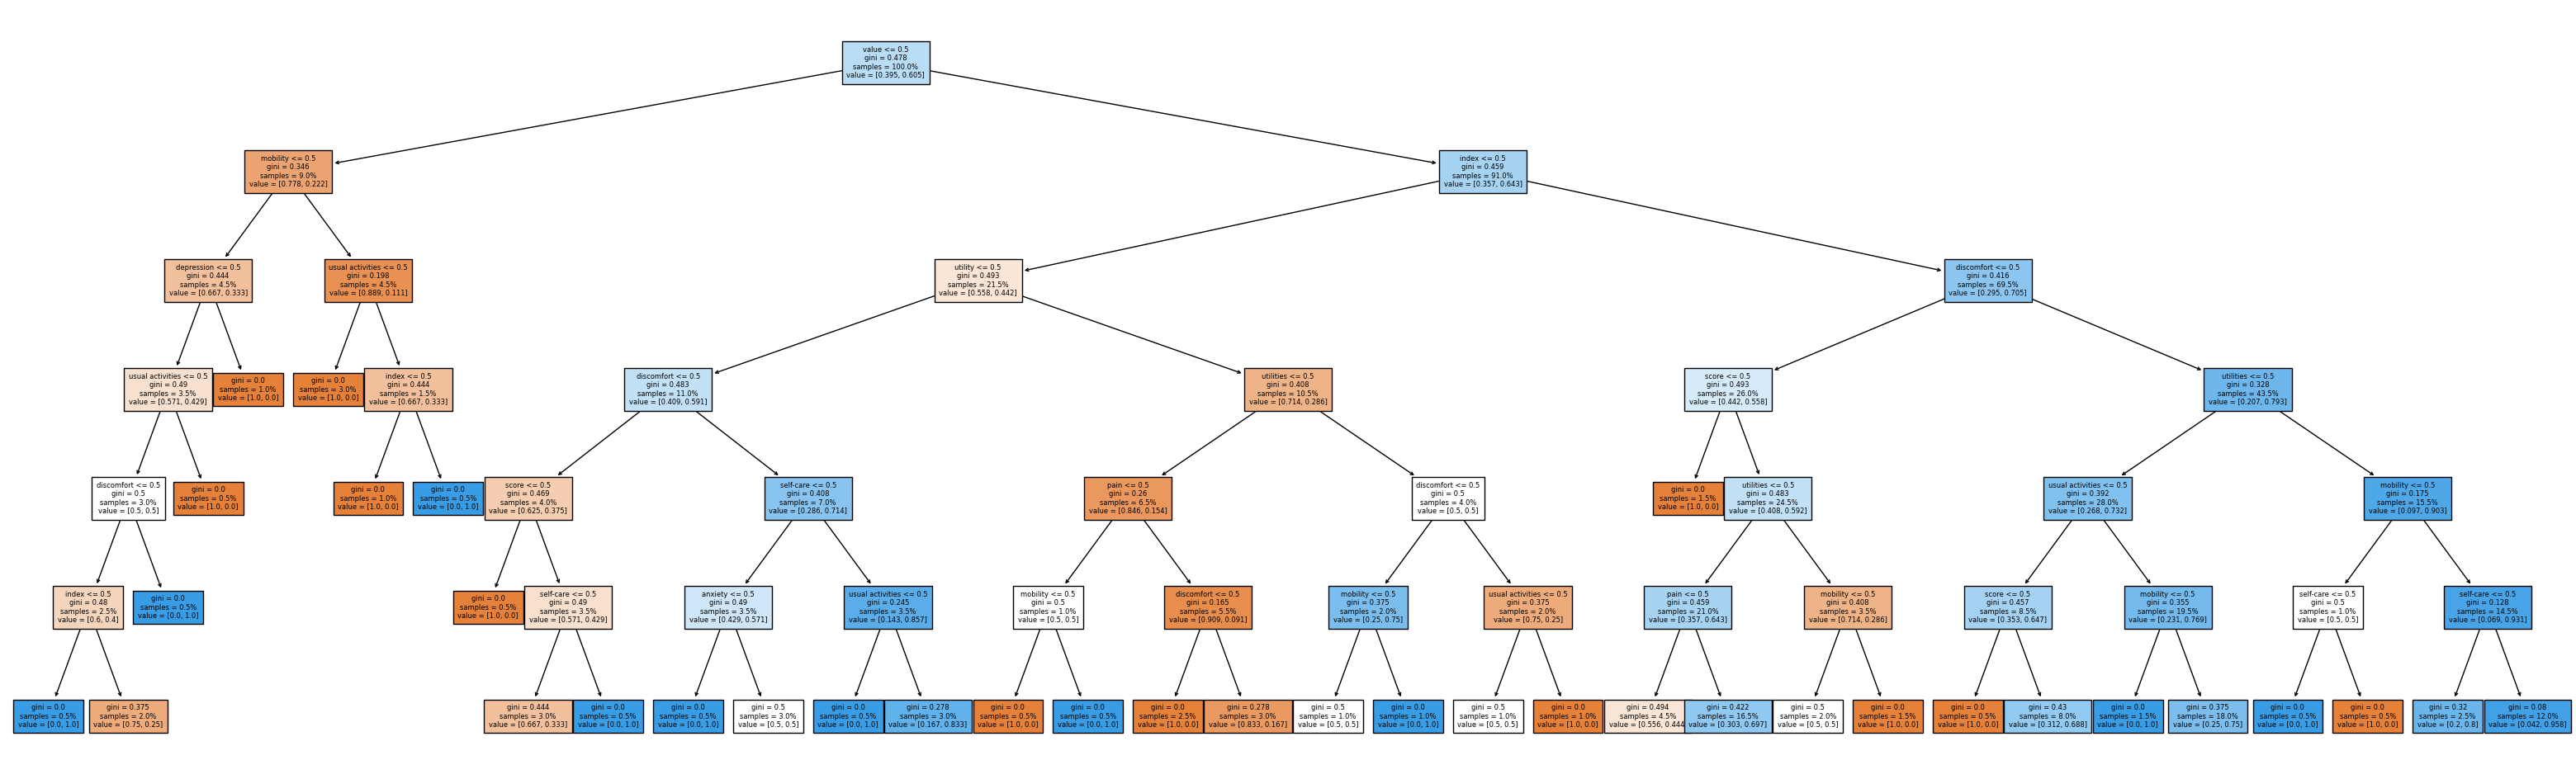

In [47]:
plt.figure(figsize=(40,12))
tree.plot_tree(clf, feature_names = relevant_columns, label = "all", filled = True, proportion = True, fontsize=6)
plt.savefig('fulltext_dt.pdf')

In [48]:
clf.score(X,Y)

0.79